In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten, kmeans2

%matplotlib inline

In [2]:
URL = 'http://api.football-data.org/v1/soccerseasons/439/teams'
TOKEN = 'c52b7825851b4357af3e06c1888152f0' # Ваш api token

In [3]:
# Функция для получения данных.

params = {'X-Auth-Token': TOKEN}

def get_data(url, result_key):
    try:
        data = requests.get(url, params=params).json()
        return data[result_key]
    except:
        print('Ошибка при открытии страницы: ')

In [4]:
# Получаем список команд
teams = get_data(URL, 'teams')

In [5]:
# Для каждой команды получем её стоимость и количество поражений.
# Собираем полученные данные для создания датафрейма.
team_for_pd = list()
for team in teams:
    cost = int(''.join(team['squadMarketValue'].split(' ')[0].split(','))) if team['squadMarketValue'] is not None else 0
    matches = get_data(team['_links']['fixtures']['href'], 'fixtures')
    losses = 0
    for match in matches:
        goals_home = match['result']['goalsHomeTeam'] if match['result']['goalsHomeTeam'] else 0
        goals_away = match['result']['goalsAwayTeam'] if match['result']['goalsAwayTeam'] else 0
        if team['name'] == match['homeTeamName']:
            losses += 1 if goals_home < goals_away else 0
        else:
            losses += 1 if goals_away < goals_home else 0
    print('Team: "{}", Сost team: {}, Losses: {}'. format(team['name'], team['squadMarketValue'], losses))
    
    team_for_pd.append({'name': team['name'],'cost': cost, 'losses': losses})

Team: "FC Rio Ave", Сost team: 26,775,000 €, Losses: 12
Team: "FC Porto", Сost team: 179,750,000 €, Losses: 4
Team: "Moreirense FC", Сost team: 13,900,000 €, Losses: 17
Team: "FC Paços de Ferreira", Сost team: 20,400,000 €, Losses: 12
Team: "Sporting CP", Сost team: 168,750,000 €, Losses: 9
Team: "Maritimo Funchal", Сost team: 20,300,000 €, Losses: 9
Team: "CD Tondela", Сost team: 10,175,000 €, Losses: 17
Team: "SL Benfica", Сost team: 202,850,000 €, Losses: 5
Team: "Boavista Porto FC", Сost team: 18,625,000 €, Losses: 11
Team: "FC Arouca", Сost team: 17,850,000 €, Losses: 17
Team: "Vitoria Setubal", Сost team: 19,775,000 €, Losses: 13
Team: "C.F. Os Belenenses", Сost team: 16,700,000 €, Losses: 14
Team: "Vitoria Guimaraes", Сost team: 34,000,000 €, Losses: 6
Team: "Sporting Braga", Сost team: 47,600,000 €, Losses: 7
Team: "GD Estoril Praia", Сost team: 18,350,000 €, Losses: 15
Team: "Feirense", Сost team: None, Losses: 14
Team: "Nacional Funchal", Сost team: 17,500,000 €, Losses: 18
T

In [6]:
# Создаем датафрейм.
df = pd.DataFrame(team_for_pd)

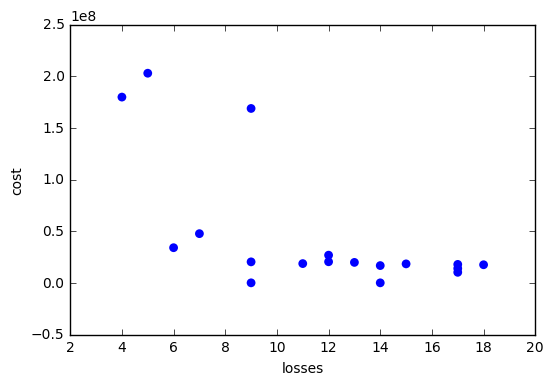

In [7]:
# Выводим на диаграмму.
df.plot.scatter(x='losses', y='cost', edgecolor='none', s=40)

In [8]:
# удаляем колонку с названиями команд.
del df['name']

In [9]:
# Нормализация данных.
whitened = whiten(df.as_matrix())
whitened

array([[ 0.42752785,  2.80993812],
       [ 2.87014497,  0.93664604],
       [ 0.22194723,  3.98074567],
       [ 0.32573551,  2.80993812],
       [ 2.69450327,  2.10745359],
       [ 0.32413876,  2.10745359],
       [ 0.16246857,  3.98074567],
       [ 3.23899253,  1.17080755],
       [ 0.29739332,  2.57577661],
       [ 0.28501857,  3.98074567],
       [ 0.31575587,  3.04409963],
       [ 0.26665603,  3.27826114],
       [ 0.54289251,  1.40496906],
       [ 0.76004952,  1.63913057],
       [ 0.29300228,  3.51242265],
       [ 0.        ,  3.27826114],
       [ 0.27942997,  4.21490718],
       [ 0.        ,  2.10745359]])

In [10]:
# Создаем 3 кластера.
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[ 2.93454692,  1.40496906],
        [ 0.22803481,  3.65877359],
        [ 0.38253393,  2.20780852]]),
 array([2, 0, 1, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2]))

In [11]:
# Определяем цвет для каждого кластера.
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]

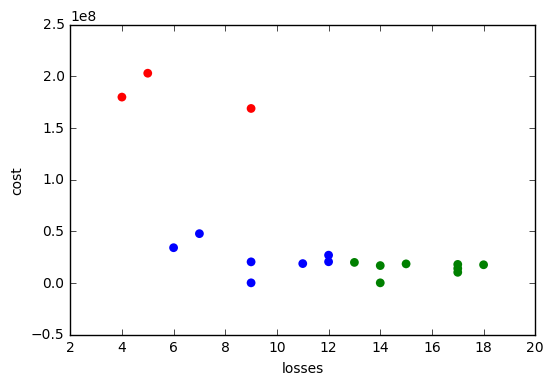

In [12]:
# Выводим на диаграмму.
df.plot.scatter(x='losses', y='cost', c=colors, edgecolor='none', s=40)

In [18]:
# Создаем 5 кластеров.
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[ 0.27515298,  3.04409963],
        [ 0.23721608,  4.03928605],
        [ 3.05456875,  1.0537268 ],
        [ 2.69450327,  2.10745359],
        [ 0.4067702 ,  1.8147517 ]]),
 array([0, 2, 1, 0, 3, 4, 1, 2, 0, 1, 0, 0, 4, 4, 0, 0, 1, 4]))

In [19]:
# Определяем цвет для каждого кластера.
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]

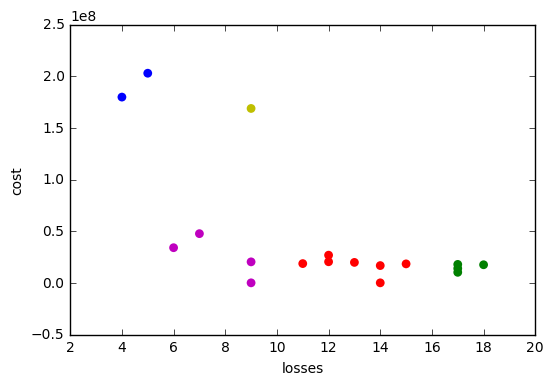

In [20]:
# Выводим на диаграмму.
df.plot.scatter(x='losses', y='cost', c=colors, edgecolor='none', s=40)